Run in root folder

In [ ]:
%cd ..

Create plots

In [3]:
from wmar.utils.analyzer import Analyzer
outdir = "out/0617_taming_generate"
watermark = "linear-stratifiedrand-h=1-d=2.0-g=0.25"
methods = {
    # "name": (outdir, relevant_dir_prefix, watermark_as_str)
    "original": (outdir, "_wam=False_decoder_ft_ckpt=0", watermark),
    "finetuned_noaugs": (outdir, "_wam=False_decoder_ft_ckpt=1", watermark),
    "finetuned_augs": (outdir, "_wam=False_decoder_ft_ckpt=2", watermark),
    "finetuned_augs+sync": (outdir, "_wam=True_decoder_ft_ckpt=2", watermark)
}

AUGS: Including Neural Compress with load: False
AUGS: Including DiffPure with load: False
Found original in cache (N = 1000)
Found finetuned_noaugs in cache (N = 1000)
Found finetuned_augs in cache (N = 1000)
Found finetuned_augs+sync in cache (N = 1000)
Mean,Median,%Above0.8 for original: 0.659 0.668 0.025
Mean,Median,%Above0.8 for finetuned_noaugs: 0.956 0.969 0.987
Mean,Median,%Above0.8 for finetuned_augs: 0.933 0.945 0.979
Mean,Median,%Above0.8 for finetuned_augs+sync: 0.883 0.914 0.878
& \textsc{Base} & 0.99 & \textcolor{red}{0.25} & \textcolor{red}{0.01} & \textcolor{red}{0.41} & \textcolor{red}{0.47} \\
& \textsc{FT} & 1.00 & \textcolor{red}{0.43} & \textcolor{red}{0.01} & 0.68 & 0.69 \\
& \textsc{FT+Augs} & 1.00 & 0.93 & \textcolor{red}{0.01} & 0.68 & 0.78 \\
& \textsc{FT+Augs+Sync} & 0.99 & 0.84 & 0.82 & 0.69 & 0.77 \\
| Method       |   None | Valuemetric   | Geometric   | Adversarial Purification   | Neural Compression   |
|--------------|--------|---------------|----------

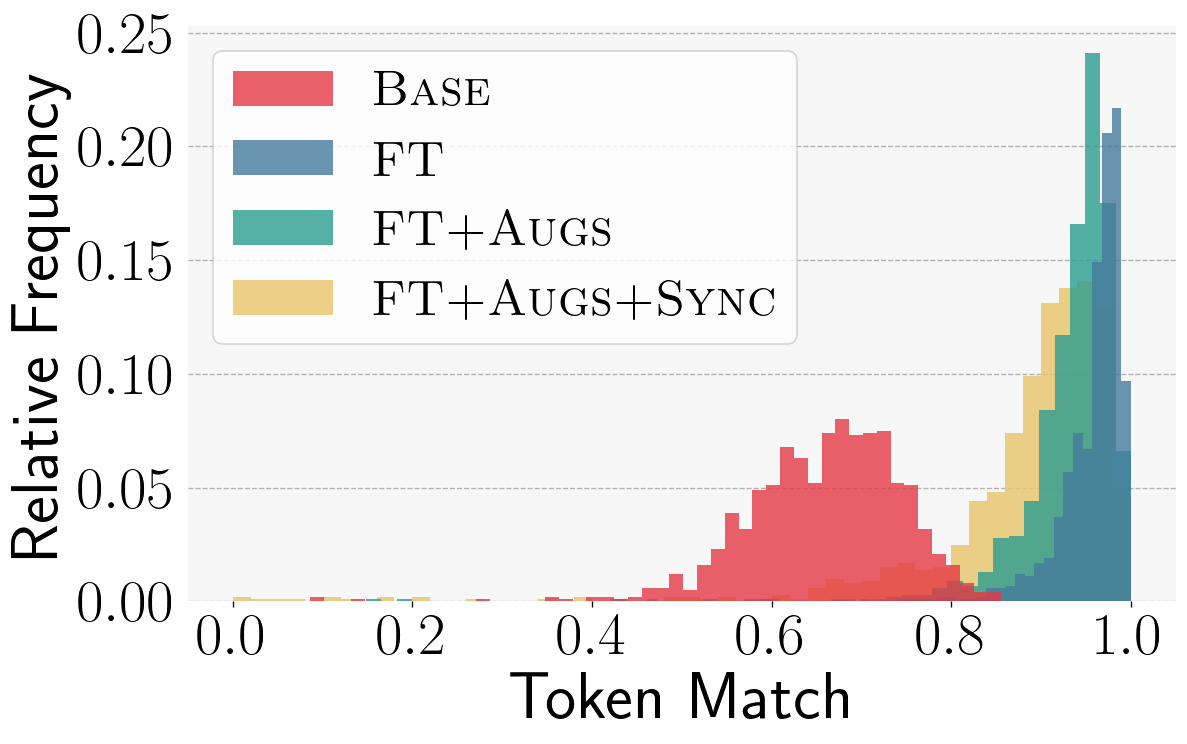

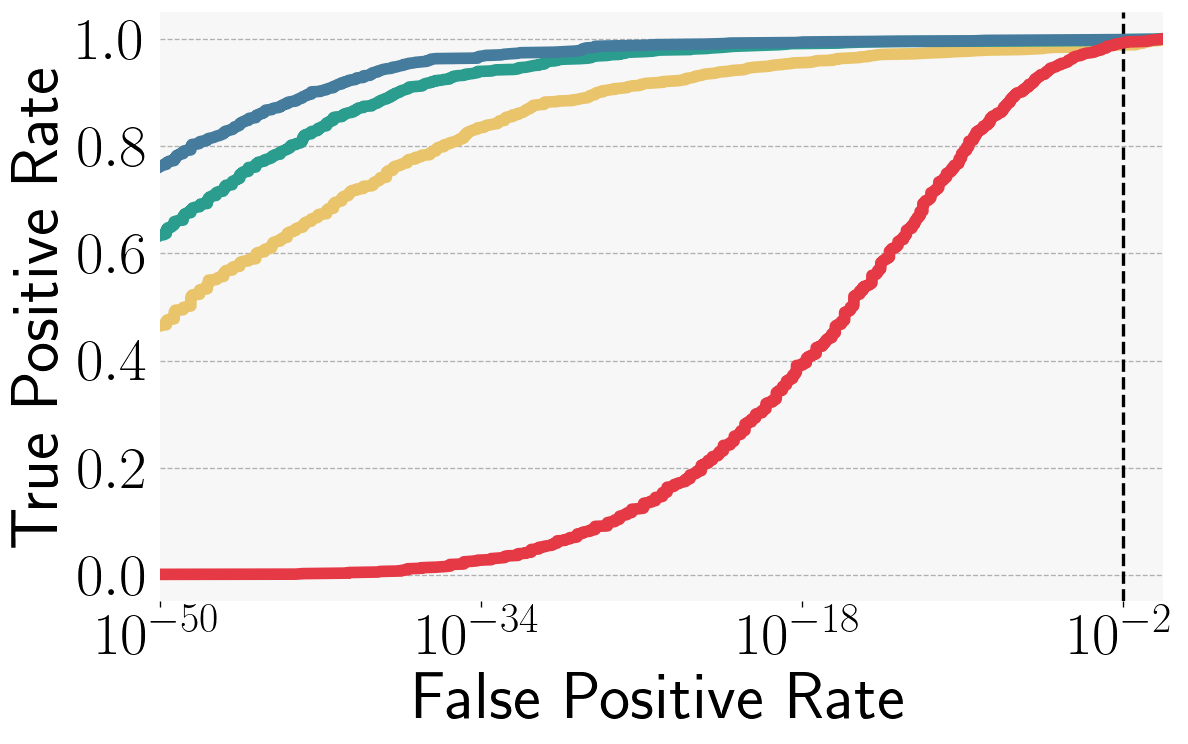

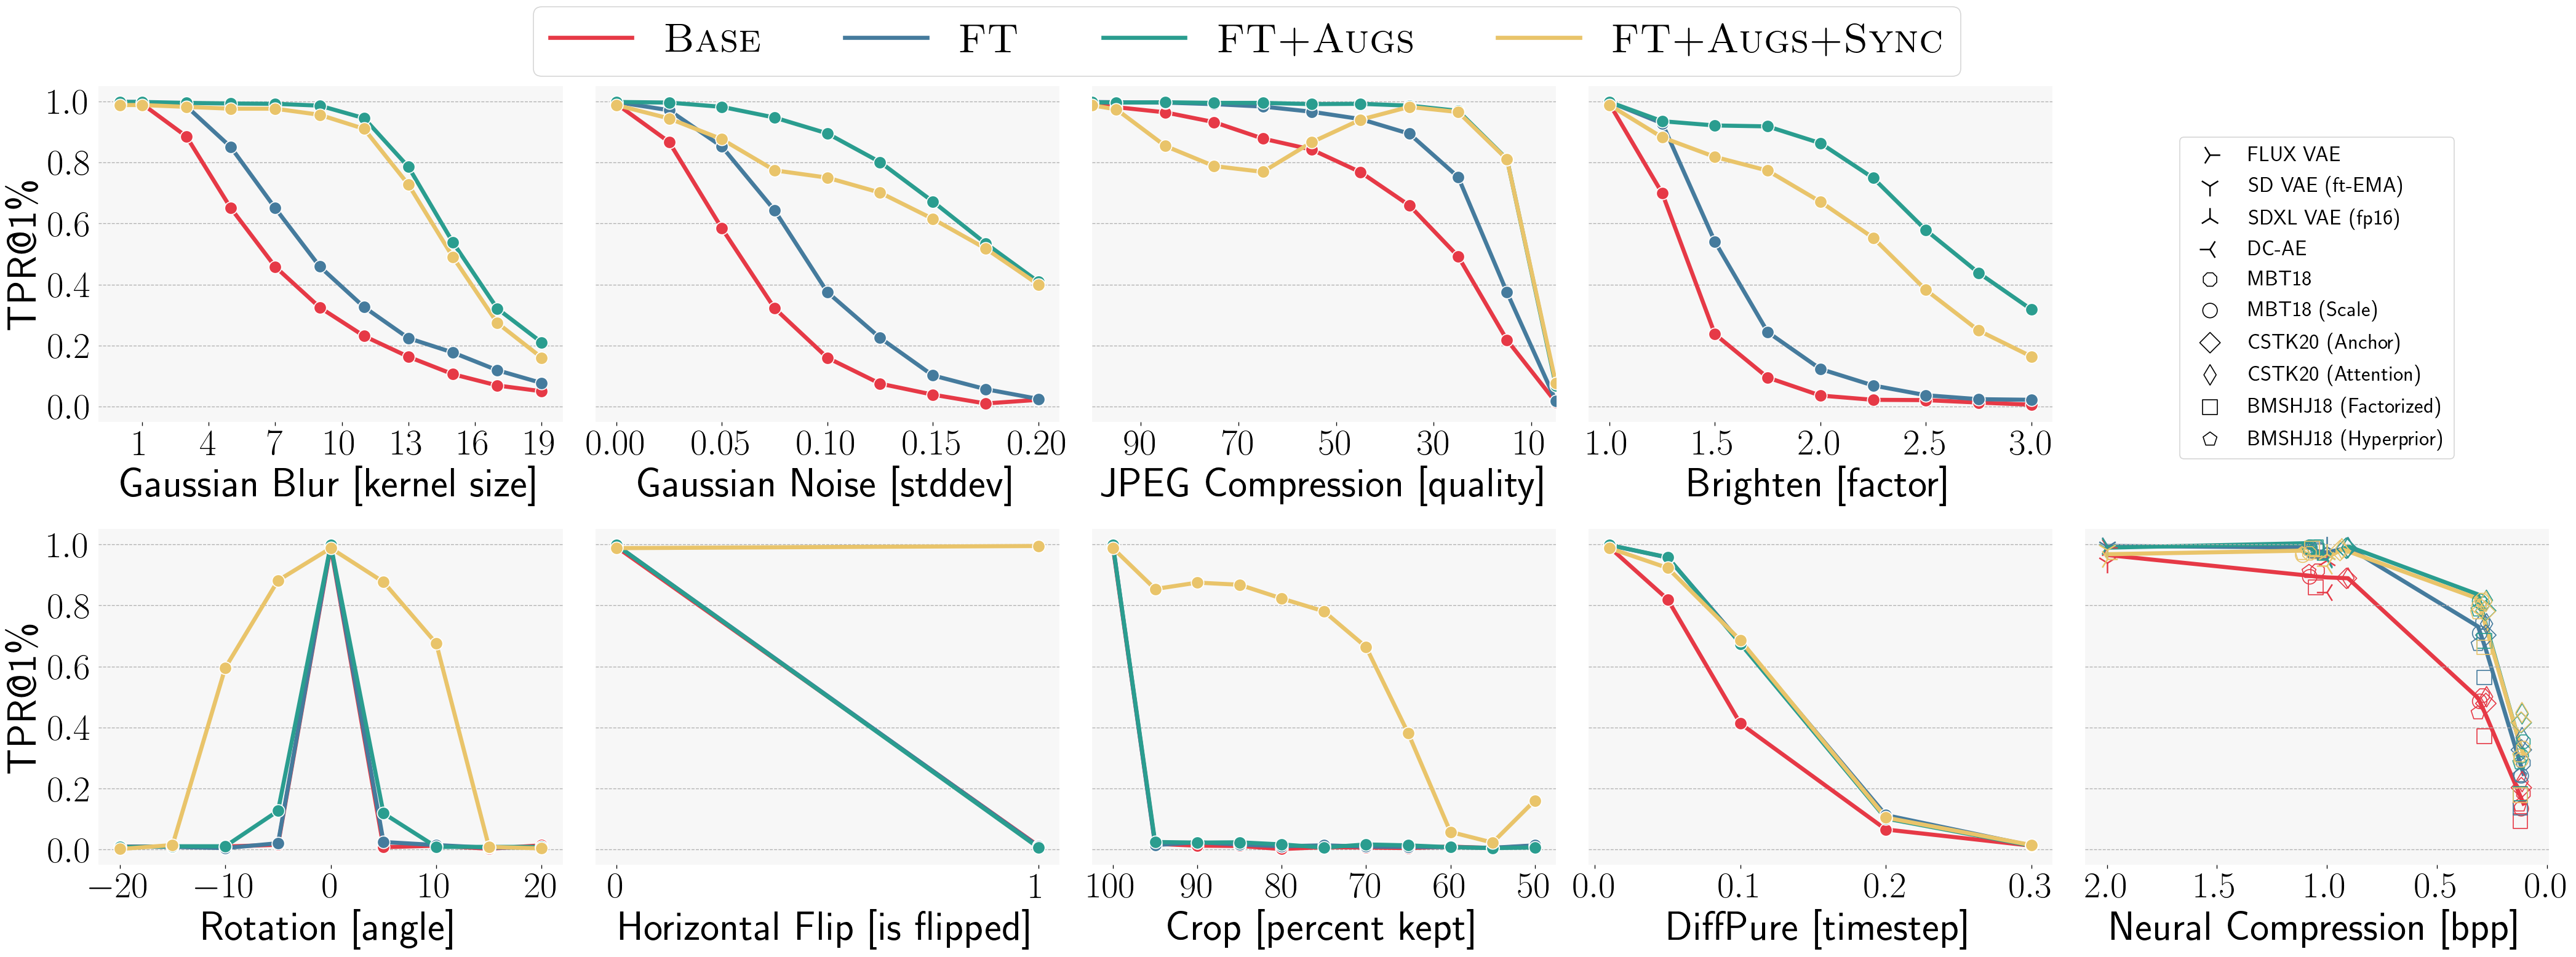

In [5]:

analyzer = Analyzer(methods, cache_path="assets/cache.json")
analyzer.set_up_latex()
analyzer.plot_l0_hist(save_to=f"{outdir}/l0_hist.png")
analyzer.plot_auc(save_to=f"{outdir}/auc.png")
analyzer.plot_robustness(save_to=f"{outdir}/robustness.png")